# Preprocessing

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('cleaned_churn_data.csv')
df.shape

(7032, 21)

### Preprocessing

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [36]:
df.drop(columns=['customerID'],inplace=True)

In [38]:
#defing features and target variable
X = df.drop(columns=['Churn'])
y = df['Churn']

In [40]:
#splitting data in traina nd test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [42]:
# Check the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (5634, 19), X_test shape: (1409, 19)
y_train shape: (5634,), y_test shape: (1409,)


In [44]:
#encoding categorical variables
#map binary category variables
binary_columns = ['Partner','Dependents','PhoneService','PaperlessBilling']

for col in binary_columns:
    X_train[col]=X_train[col].map({'Yes':1,'No':0})
    X_test[col]=X_test[col].map({'Yes':1,'No':0})

In [46]:
#one-hot encode multiclass categorical variables
categorical_columns = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                       'StreamingMovies', 'Contract', 'PaymentMethod']

X_train = pd.get_dummies(X_train,columns=categorical_columns,drop_first=True)
X_test = pd.get_dummies(X_test,columns=categorical_columns,drop_first=True)

#ensure both x_train and x_tets have same columns
X_test = X_test.reindex(columns=X_train.columns,fill_value=0)

In [48]:
print(X_train.columns)
print(X_test.columns)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')
Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'gender_

In [50]:
#scaling Numerical Features
numerical_features=['tenure','MonthlyCharges','TotalCharges']
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.fit_transform(X_test[numerical_features])

In [52]:
# Save the processed data
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

### MODEL DEVELOPMENT AND EVALUATION

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix,classification_report

In [57]:
#load the preprocessed data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_tarin = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [59]:
print(X_train.isnull().sum())  # Check missing values in features
print(y_train.isnull().sum())  # Check missing values in target

SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMo

In [61]:
#logistic regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train,y_train)

y_pred_logreg = logreg.predict(X_test)
y_pred_prob_logreg = logreg.predict_proba(X_test)[:,1] #probability of class 1(churn)

#evaluation
print("Logistic Regression performance:")
print(classification_report(y_test,y_pred_logreg))
print("ROC_AUC SCORE:",roc_auc_score(y_test,y_pred_prob_logreg))

Logistic Regression performance:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.55      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

ROC_AUC SCORE: 0.8420341522643313


In [63]:
#Random Forest Classifier 
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]

#evaluation
print("Random Forest Performance:")
print(classification_report(y_test,y_pred_rf))
print("ROC_AUC score:",roc_auc_score(y_test,y_pred_prob_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.65      0.47      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

ROC_AUC score: 0.8155364385543414


In [65]:
# Train XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Evaluate XGBoost
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_xgb))

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1035
           1       0.58      0.51      0.54       374

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.69      1409
weighted avg       0.76      0.77      0.77      1409

ROC-AUC Score: 0.8081712263297941


In [67]:
# Logistic Regression is the best choice because it has:
# Highest ROC-AUC (0.84)
# Highest recall for churners (0.55) 
# Balanced precision & recall (better F1-score)

In [71]:
#hyperparameter tuning Logistic Regression Model

from sklearn.model_selection import GridSearchCV


# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'solver': ['liblinear', 'lbfgs', 'saga'],  
    'class_weight': [None, 'balanced']  
}

# Initialize GridSearchCV with recall as the scoring metric
grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),  
    param_grid,
    cv=8,  
    scoring='recall', 
    n_jobs=-1 
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'class_weight': 'balanced', 'solver': 'liblinear'}
Best Recall Score: 0.8013304295325168


In [73]:
# Get the best model from GridSearchCV
best_logreg = grid_search.best_estimator_

# Predictions on the test set
y_pred_best_logreg = best_logreg.predict(X_test)
y_pred_proba_best_logreg = best_logreg.predict_proba(X_test)[:, 1]

# Classification report
print("\nTuned Logistic Regression Performance:")
print(classification_report(y_test, y_pred_best_logreg))

# ROC-AUC Score
roc_auc_best_logreg = roc_auc_score(y_test, y_pred_proba_best_logreg)
print(f"ROC-AUC: {roc_auc_best_logreg:.2f}")


Tuned Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1035
           1       0.51      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409

ROC-AUC: 0.84


### Final model

In [81]:
import joblib

# Save the model
joblib.dump(best_logreg, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [77]:
# Get feature coefficients from the best estimator
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': grid_search.best_estimator_.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Display the top features
print("Top Features Influencing Churn Prediction:")
print(coefficients)

Top Features Influencing Churn Prediction:
                                  Feature  Coefficient
11            InternetService_Fiber optic     1.117977
7                            TotalCharges     0.474909
28         PaymentMethod_Electronic check     0.397358
24                    StreamingMovies_Yes     0.381526
22                        StreamingTV_Yes     0.355295
5                        PaperlessBilling     0.334711
10                      MultipleLines_Yes     0.305075
0                           SeniorCitizen     0.152238
29             PaymentMethod_Mailed check     0.046100
8                             gender_Male     0.030040
18                   DeviceProtection_Yes     0.020103
1                                 Partner     0.016463
27  PaymentMethod_Credit card (automatic)    -0.006282
16                       OnlineBackup_Yes    -0.093311
9          MultipleLines_No phone service    -0.159668
23    StreamingMovies_No internet service    -0.168591
21        StreamingTV_

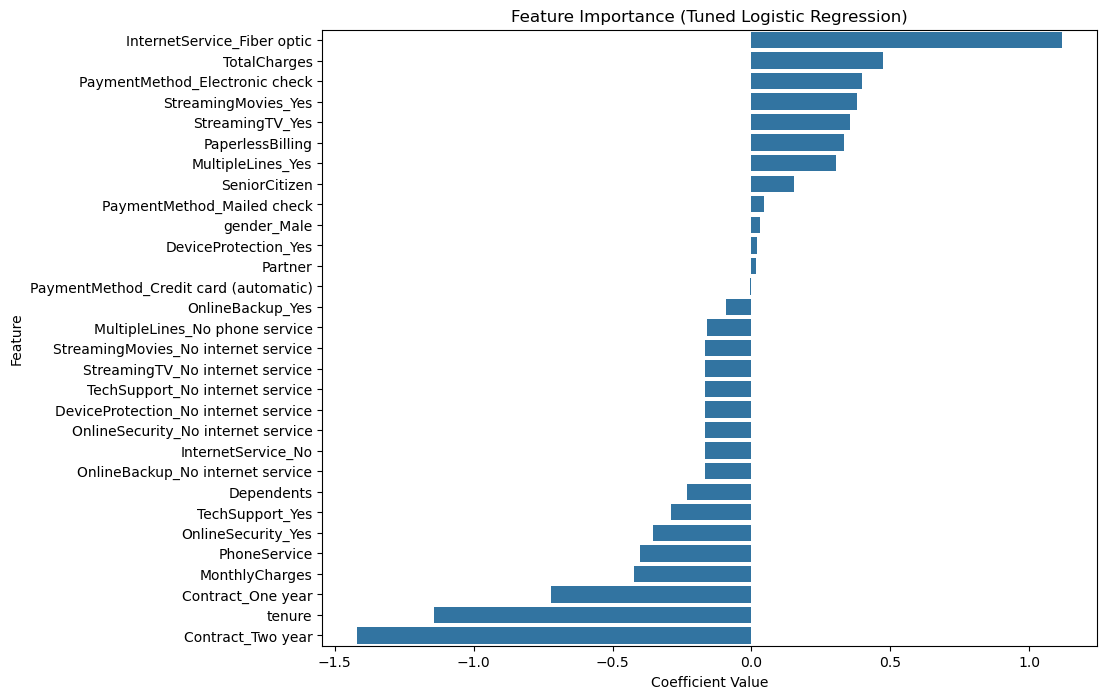

In [79]:
# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title("Feature Importance (Tuned Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

### prediction on new data

In [85]:
new_data = pd.DataFrame({
    'customerID': ['1001'],
    'gender': ['Male'],
    'SeniorCitizen': [0],
    'Partner': ['Yes'],
    'Dependents': ['No'],
    'tenure': [12],
    'PhoneService': ['Yes'],
    'MultipleLines': ['No'],
    'InternetService': ['Fiber optic'],
    'OnlineSecurity': ['No'],
    'OnlineBackup': ['No'],
    'DeviceProtection': ['No'],
    'TechSupport': ['No'],
    'StreamingTV': ['Yes'],
    'StreamingMovies': ['Yes'],
    'Contract': ['Month-to-month'],
    'PaperlessBilling': ['Yes'],
    'PaymentMethod': ['Electronic check'],
    'MonthlyCharges': [79.85],
    'TotalCharges': [958.2]
})

In [87]:
new_data.drop(columns=['customerID'], inplace=True)

# Map binary categorical variables ('Yes'/'No') to 1/0
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_columns:
    new_data[col] = new_data[col].map({'Yes': 1, 'No': 0})

# One-hot encode multi-class categorical variables
categorical_columns = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                       'StreamingMovies', 'Contract', 'PaymentMethod']

# Perform one-hot encoding
new_data = pd.get_dummies(new_data, columns=categorical_columns, drop_first=True)

# Ensure that the new data has the same columns as the training data
new_data = new_data.reindex(columns=X_train.columns, fill_value=0)

# Scale numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
new_data[numerical_features] = scaler.transform(new_data[numerical_features])

In [91]:
loaded_model = joblib.load('logistic_regression_model.pkl')

In [95]:
predictions = loaded_model.predict(new_data)

print("Predicted Churn (0 = No, 1 = Yes):")
print(predictions)

# Predict probabilities
probabilities = loaded_model.predict_proba(new_data)[:, 1]
print("Probability of Churn:")
print(probabilities)

Predicted Churn (0 = No, 1 = Yes):
[0]
Probability of Churn:
[0.45763209]


# INSIGHTS

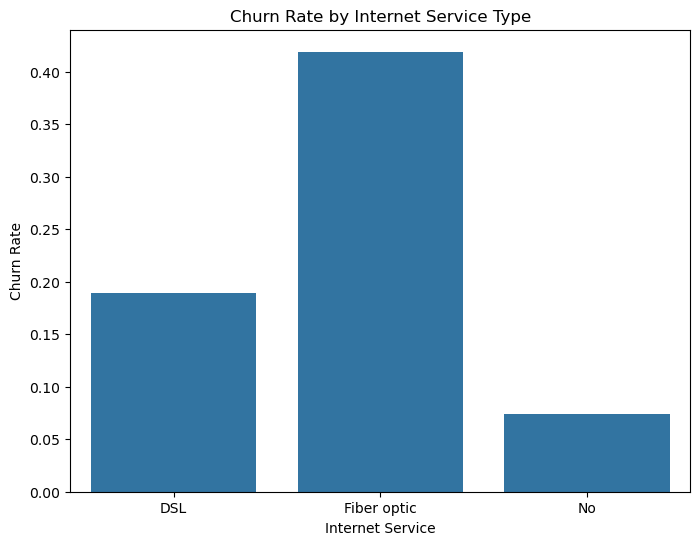

In [100]:
# Group by InternetService and calculate churn rate
churn_by_internet = df.groupby('InternetService')['Churn'].mean().reset_index()

# Plot churn rate by InternetService
plt.figure(figsize=(8, 6))
sns.barplot(x='InternetService', y='Churn', data=churn_by_internet)
plt.title("Churn Rate by Internet Service Type")
plt.xlabel("Internet Service")
plt.ylabel("Churn Rate")
plt.show()

#fiber optic customers are more likely to churn

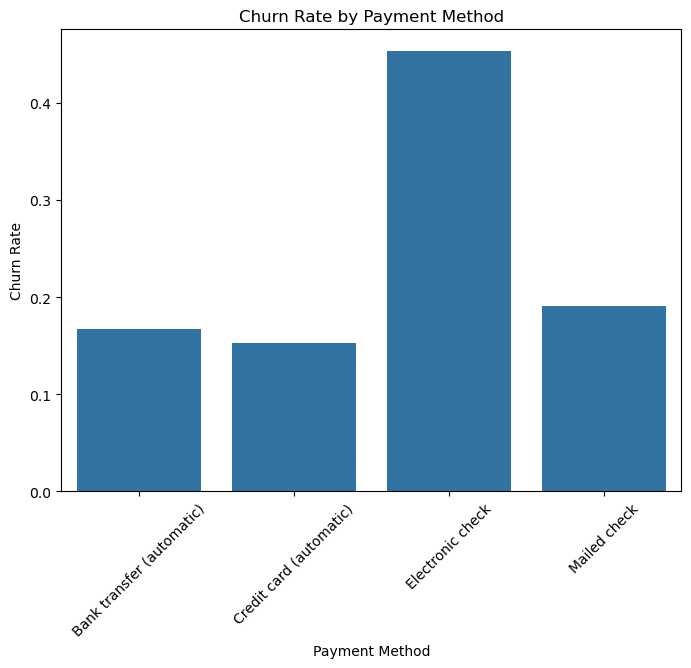

In [102]:
# Group by PaymentMethod and calculate churn rate
churn_by_payment = df.groupby('PaymentMethod')['Churn'].mean().reset_index()

# Plot churn rate by PaymentMethod
plt.figure(figsize=(8, 6))
sns.barplot(x='PaymentMethod', y='Churn', data=churn_by_payment)
plt.title("Churn Rate by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)
plt.show()

#electronic check users are more likely to churn

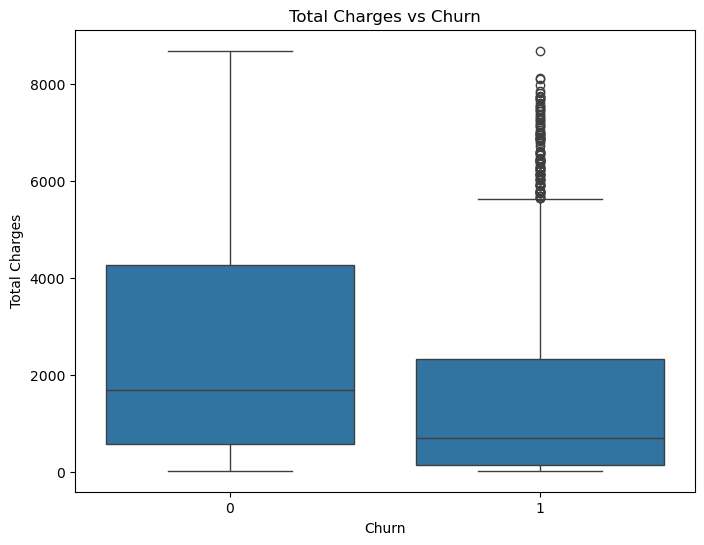

In [104]:
# Convert TotalCharges to numeric (if not already)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Plot TotalCharges vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title("Total Charges vs Churn")
plt.xlabel("Churn")
plt.ylabel("Total Charges")
plt.show()

#higher total charges increase churn risk

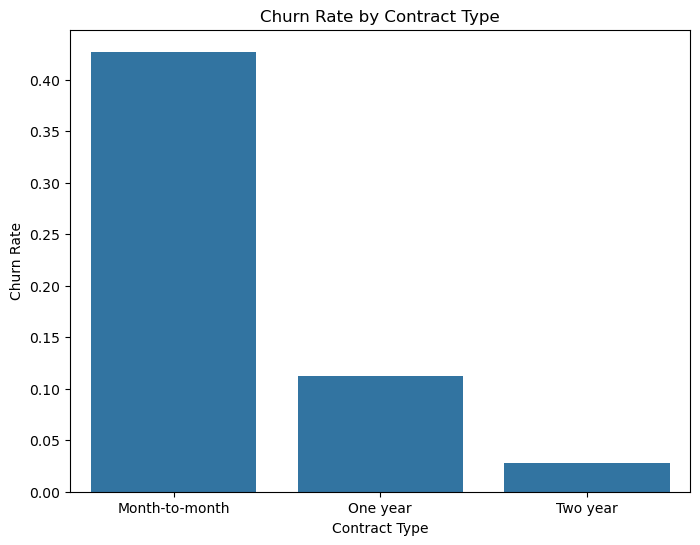

In [106]:
# Group by Contract and calculate churn rate
churn_by_contract = df.groupby('Contract')['Churn'].mean().reset_index()

# Plot churn rate by Contract
plt.figure(figsize=(8, 6))
sns.barplot(x='Contract', y='Churn', data=churn_by_contract)
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate")
plt.show()

#long-term contracts reduce churn

### Prioritize High-Risk Customers
### Using the model’s probability scores, you can prioritize retention efforts for high-risk customers:

### High-Risk Customers (Probability > 0.7) :
### Immediate action is required.
### Offer personalized retention offers, such as discounts, free upgrades, or dedicated account managers.
### Moderate-Risk Customers (Probability 0.4–0.7) :
### Monitor closely and provide proactive support.
### Send targeted marketing campaigns highlighting the value of staying with the company.
### Low-Risk Customers (Probability < 0.4) :
### Focus on maintaining satisfaction through regular engagement and upselling opportunities.

#### VIDEO EXPLANATION LINK:

In [ ]:
https://drive.google.com/file/d/1VXUP-eqA_CY6MJTW6I1hW168NVthFZN4/view?usp=sharing